<a href="https://colab.research.google.com/github/hannari-python/tutorial/blob/master/trade_balance/kaggle_datasets_download_with_jupyterdash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 貿易収支データの分析

## データの出典情報

1. https://www.kaggle.com/zanjibar/japan-trade-statistics
2. https://www.kaggle.com/zanjibar/japantradestatistics2

1.2.共にライセンスは https://creativecommons.org/licenses/by-sa/4.0/

## データの簡単な紹介

- FILLME
- FILLME
- FILLME

## 課題1

https://www.kaggle.com/zanjibar/japan-trade-statistics
https://www.kaggle.com/zanjibar/japantradestatistics2

にどのような情報があるかざっとながめてみましょう。

## Japan trade statistics のデータの取得と解凍

Kaggleにある[データ可視化の例](https://www.kaggle.com/zanjibar/year-1997-top-20-export-import-graph)を試すため、

https://github.com/hannari-python/tutorial/tree/master/data/japan-trade-statistics

からデータをダウンロードします。

! は FILLME と呼ばれます。
!の後にLinuxコマンドを書くとそのセルの命令はPythonプログラムではなくLinuxのコマンドとして実行されます。

wget はデータをダウンロードするのに使うことができるLinuxのコマンドです。


In [1]:
!wget https://github.com/hannari-python/tutorial/raw/master/data/japan-trade-statistics/y_1997.db
!wget https://github.com/hannari-python/tutorial/raw/master/data/japan-trade-statistics/trade_meta_data.db

--2020-08-14 13:51:11--  https://github.com/hannari-python/tutorial/raw/master/data/japan-trade-statistics/y_1997.db
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/hannari-python/tutorial/master/data/japan-trade-statistics/y_1997.db [following]
--2020-08-14 13:51:12--  https://media.githubusercontent.com/media/hannari-python/tutorial/master/data/japan-trade-statistics/y_1997.db
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482275328 (460M) [application/octet-stream]
Saving to: ‘y_1997.db’

y_1997.db           100%[===================>] 459.93M   177MB/s    in 2.6s    

2020-08-14 1

## データの読み込み

ここでは FILLME を行います。

FILLME行のFILLMEではFILLMEを行っています。


In [3]:
import sqlite3
import pandas as pd

#  1997 - data
conn = sqlite3.connect('./y_1997.db')
cursor = conn.cursor()
# hs code,country,hs,code
attach = 'attach "./trade_meta_data.db" as code'
cursor.execute(attach)
# import hs,country code as pandas
tmpl = "{hs}_{lang}_df =  pd.read_sql('select * from code.{hs}_{lang}',conn)"
for hs in ['hs2','hs4','hs6','hs6','hs9']:
    for lang in ['jpn','eng']:
        exec(tmpl.format(hs=hs,lang=lang))        
# country 
country_eng_df = pd.read_sql('select * from code.country_eng',conn)
country_eng_df['Country']=country_eng_df['Country'].apply(str)
country_jpn_df = pd.read_sql('select * from code.country_jpn',conn)
country_jpn_df['Country']=country_jpn_df['Country'].apply(str)

## Seabornによる可視化

[seaborn](https://seaborn.pydata.org/) は FILLME を行うPython packageです。

FILLME 行では FILLME を行っています。

`lineplot`は FILLME を行う関数です。
オプション FILLME は FILLME をするものです。



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


export import from 1997
CPU times: user 4.01 s, sys: 334 ms, total: 4.35 s
Wall time: 4.37 s


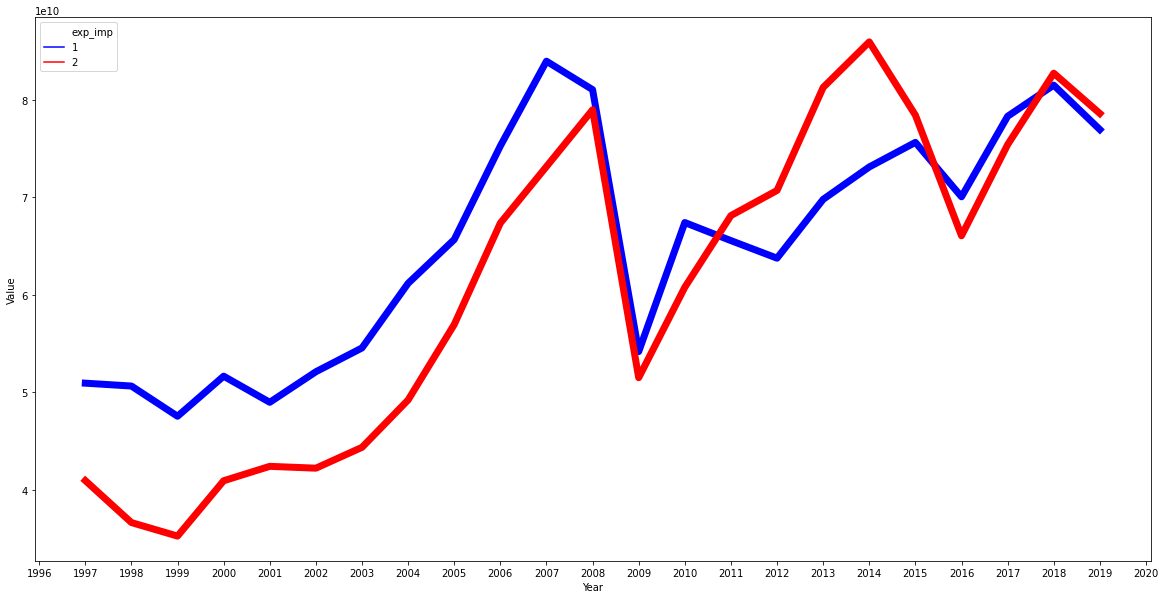

In [4]:
%%time

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

# show_tables 	year_from_1997
# pd.read_sql(show_tables,conn_1997)
sql="""
select  exp_imp,Year,sum(Value) as Value from year_from_1997
group by Year,exp_imp
"""[1:-1]
xdf = pd.read_sql(sql,conn)

plt.figure(figsize=(20, 10))
ax  = sns.lineplot(x='Year',y='Value',hue='exp_imp',linewidth = 7.0,
             palette={1: "b", 2: "r"},
             data=xdf)
ax.legend_._loc = 2
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
print('export import from 1997')

図の
- 横軸は年度は
- 縦軸はFILLMEを
- 系列1はFILLMEを
- 系列2はFILLMEを
表します。

次にFILLMEを行います。

関数`country_graph`はFILLMEを行うものです。
引数FILLMEはFILLMEです。


In [5]:
def country_graph(Country,title):
    sql="""
    select  exp_imp,Year,sum(Value) as Value from year_from_1997
    where Country='{Country}'
    group by Year,exp_imp
    """[1:-1]
    xdf = pd.read_sql(sql.format(Country=Country),conn)
    plt.figure(figsize=(20, 10))

    ax  = sns.lineplot(x='Year',y='Value',hue='exp_imp',linewidth = 7.0,
             palette={1: "b", 2: "r"},
             data=xdf)
    ax.legend_._loc = 2
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
    print(title)

China


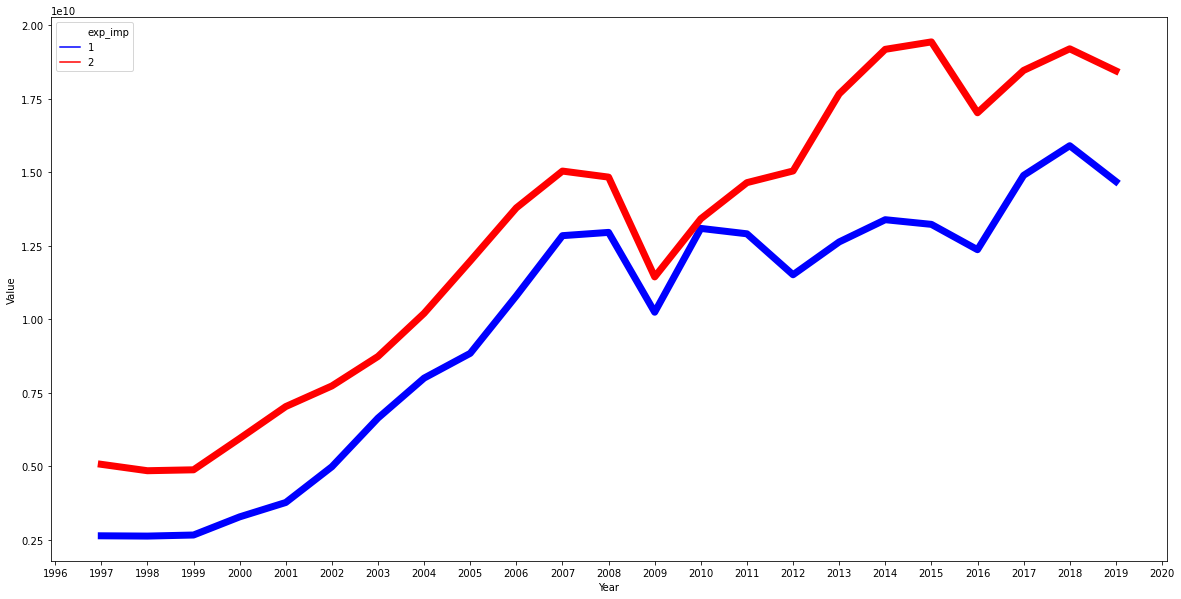

In [6]:
# China (105)
Country = '105'
title = 'China'
country_graph(Country,title)

## データの確認

- `exp_imp` は FILLME を
- `Value` はFILLMEを
表します。

In [8]:
xdf

,exp_imp,Year,Value
0,1,1997,50937991859
1,2,1997,40956182573
2,1,1998,50645003938
3,2,1998,36653647183
4,1,1999,47547556241
5,2,1999,35268008063
6,1,2000,51654197760
7,2,2000,40938422968
8,1,2001,48979244311
9,2,2001,42415533002


In [9]:
sql="""
select exp_imp,Year,sum(Value) as Value, Country from year_from_1997
group by Year, Country, exp_imp
"""[1:-1]
dff = pd.read_sql(sql,conn)
dff

,exp_imp,Year,Value,Country
0,1,1997,3153238334,103
1,2,1997,1762757028,103
2,1,1997,21630387,104
3,2,1997,36535244,104
4,1,1997,2630720664,105
...,...,...,...,...
10217,1,2019,5526581,627
10218,2,2019,8278,627
10219,1,2019,2010416,628
10220,2,2019,1710270,628


`dff`はFILLMEを行ったものです。

`Country`はFILLMEを表します。

In [ ]:
country_eng_df.head()

,Country,Country_name,Area
0,103,Korea,Asia
1,104,North_Korea,Asia
2,105,China,Asia
3,106,Taiwan,Asia
4,107,Mongolia,Asia


## Plotly.Expressを使った可視化

plotly.express をFILLMEを行うPython packageです。
FILLMEが特徴です。

`as`はインポートしたPythonモジュールに別名をつけるPythonの予約語です。

In [ ]:
import plotly.express as px

`show_plotly_graph`はFILLMEを入力とし、FILLMEを出力します。

In [ ]:
def show_plotly_graph(country_code, df, df_cnt):
  xdf = df[df["Country"] == country_code]
  country_name = df_cnt[df_cnt["Country"] == country_code]["Country_name"].values[0]
  return px.line(xdf, x="Year", y="Value", color="exp_imp", title=country_name)

In [ ]:
show_plotly_graph('106', dff, country_eng_df)

- 図の縦軸はFILLMEを
- 系列1はFILLMEを
- 系列2はFILLMEを

表します。

# JupyterDashによるアプリケーション化

dashはFILLMEを行うPythonパッケージです。

jupyterdashはFILLMEを行うPythonパッケージです。

Pythonパッケージは`pip`コマンドでインストールすることができます。


In [11]:
!pip install jupyter-dash

     |████████████████████████████████| 51kB 1.8MB/s 
     |████████████████████████████████| 71kB 3.8MB/s 
     |████████████████████████████████| 1.2MB 36.4MB/s 
     |████████████████████████████████| 3.4MB 29.9MB/s 
     |████████████████████████████████| 194kB 45.1MB/s 
     |████████████████████████████████| 1.8MB 34.8MB/s 
     |████████████████████████████████| 358kB 19.7MB/s 
  Created wheel for dash: filename=dash-1.14.0-cp36-none-any.whl size=80129 sha256=ac1931f182c1448949398eacf136749162ff2c355c547a27bb497f77c0efd50c
  Stored in directory: /root/.cache/pip/wheels/1d/54/0b/e846f762d47e8abc9234419822d013dfb2ccf957b48e411dc6
  Created wheel for ansi2html: filename=ansi2html-1.5.2-cp36-none-any.whl size=13863 sha256=8e3967965b2afadc97097fb593c20e6a961f3a4448aeffd0b3a1be8082424a3c
  Stored in directory: /root/.cache/pip/wheels/f9/ea/e0/1ed3c3945ce073f930f3e5aa2b9bbadb03cd2efc8f8695cd61
  Created wheel for flask-compress: filename=Flask_Compress-1.5.0-cp36-none-any.whl size=5273

In [12]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 

In [14]:
for num, test in enumerate(country_eng_df):
  print(num, test)

0 Country
1 Country_name
2 Area


ここではFILLMEを行うダッシュボードを作ります。

ダッシュボードとはFILLMEを行うものです。


In [15]:
app = JupyterDash(__name__)

app.layout = html.Div([
           dcc.Dropdown(id='country_dropdown',
                        options=[{'label': country_eng_df.iloc[num, 1], 'value': country_eng_df.iloc[num, 0]} for num in range(len(country_eng_df))],
                        value='103'
                        ),
            dcc.Graph(id="selected_graph")        
          
])

@app.callback(Output('selected_graph', 'figure'), [Input('country_dropdown', 'value')])
def update_graph(selected_value):
  return show_plotly_graph(selected_value, dff, country_eng_df)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

このダッシュボードはFILLMEを行います。

FILLMEを行うとFILLMEが動的に更新されます。

参考：https://qiita.com/katsu1110/items/a8d508a1b6f07bd3a243

## Kaggle APIのための設定

最初のセルでKaggle APIトークンをgoogle colabのサーバにアップロードします。

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mazarimono001","key":"f56c0107c0f0e67d481af8dbcf141023"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pip install kaggle
!pip install dash jupyter_dash dash
!pip install -U plotly

     |████████████████████████████████| 71kB 1.9MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 1.2MB 17.5MB/s 
     |████████████████████████████████| 3.4MB 26.0MB/s 
     |████████████████████████████████| 194kB 27.0MB/s 
     |████████████████████████████████| 1.8MB 38.6MB/s 
     |████████████████████████████████| 358kB 44.4MB/s 
  Created wheel for dash: filename=dash-1.14.0-cp36-none-any.whl size=80129 sha256=ec4aa51443ebf42e3842bb217e2ee073e6346cd31a7c33412de2fb48f8c6c3ca
  Stored in directory: /root/.cache/pip/wheels/1d/54/0b/e846f762d47e8abc9234419822d013dfb2ccf957b48e411dc6
  Created wheel for flask-compress: filename=Flask_Compress-1.5.0-cp36-none-any.whl size=5273 sha256=8f1df63f31cec66540ee963ce4779c28f169251b6038d258e481014df986f0bf
  Stored in directory: /root/.cache/pip/wheels/f7/e9/e4/5afc286be7c87461375e33152558415dfeb0c8f5af3b50e742
  Created wheel for dash-renderer: filename=dash_renderer-1.6.0-cp36-none-any.whl si

In [ ]:
!kaggle datasets download -d zanjibar/japan-trade-statistics

 99% 687M/697M [00:05<00:00, 175MB/s]
100% 697M/697M [00:05<00:00, 138MB/s]


In [ ]:
!unzip japan-trade-statistics.zip

Archive:  japan-trade-statistics.zip
  inflating: codes.db                
  inflating: custom_2020.db          
  inflating: custom_from_2012.db     
  inflating: y_1997.db               
  inflating: ym_2018.db              
  inflating: ym_2019.db              
  inflating: ym_2020.db              


In [ ]:
!kaggle datasets download -d zanjibar/japantradestatistics2

  0% 0.00/834k [00:00<?, ?B/s]
100% 834k/834k [00:00<00:00, 45.6MB/s]


In [ ]:
!unzip japantradestatistics2.zip

Archive:  japantradestatistics2.zip
  inflating: check_data_1979.db      
  inflating: trade_meta_data.db      
